By Michael Holt, as part of team 3 for the DataPhilly 2022 Datathon to help ElderNet.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

# Importing Data

In [12]:
donations_df = pd.read_csv('../../data/donations_anonymized.csv')

# Largest Donation Amount

In [13]:
donations_df.head(10)

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift
5,956,19003.0,Active,False,False,N,01/07/2019,32.0,Check,Fall Towns,Gift
6,835,19072.0,Active,False,False,N,01/07/2019,100.0,Check,Board,Gift
7,119,19041.0,Active,False,False,N,01/08/2019,100.0,Check,Board,Gift
8,485,19041.0,Active,False,False,N,01/09/2019,50.0,Check,Fall Towns,Gift
9,192,19403.0,Active,False,False,N,01/09/2019,1000.0,Check,Corporatio,Gift


The largest single donation recorded here can be found through max().

In [14]:
max(donations_df.amount)

186092.0

A filter for all rows which have this value. This will help add some context.

In [15]:
donations_df.loc[: , "amount"] == max(donations_df.amount)

0       False
1       False
2       False
3       False
4       False
        ...  
2185    False
2186    False
2187    False
2188    False
2189    False
Name: amount, Length: 2190, dtype: bool

In [16]:
mask = donations_df.loc[: , "amount"] == max(donations_df.amount)

In [17]:
donations_df[mask]

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
1809,589,NaN,Active,False,False,N,01/14/2021,186092.0,Check,Misc,Gift


This above row has data on the largest recorded donation. There was no tie for the biggest donation. The biggest donation occurred on 1/14/2021, was not from an organization, and was a check for a whopping $186,092.

## Seeing the contributions of each donation. By size.

In particular, graphing the cumulative sum of donations when ordered by size.

In [18]:
donations_df.head()

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift


Ascending sizes.

In [51]:
# producing a pandas column full of this cumulative sum
donations_df.sort_values( by = 'amount', inplace = True)

sumthing = 0
cum_sum = []
for donation in donations_df.amount:
    sumthing += donation
    cum_sum.append(sumthing)
    
donations_df['cum_sum'] = cum_sum
donations_df

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target,cum_sum
1330,68,19004.0,Active,False,False,N,08/27/2020,0.0,InKind,In-Kind,Gift,0.0
914,186,NaN,Active,False,False,N,01/31/2020,1.0,Check,Fall Towns,Gift,1.0
1897,495,19083.0,Active,False,False,N,04/28/2021,1.0,Check,In/Out,Gift,2.0
209,743,NaN,Active,False,False,Y,04/29/2019,2.0,Check,Fall Towns,Gift,4.0
69,743,NaN,Active,False,False,Y,03/15/2019,2.0,Check,Fall Towns,Gift,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,372,19107.0,Active,False,False,N,07/08/2020,30000.0,Check,Foundation,Gift,950973.2
1876,816,NaN,Active,False,False,N,04/07/2021,35000.0,Check,Misc,Gift,985973.2
1611,152,19101.0,Active,False,False,N,11/30/2020,50000.0,Check,Foundation,Gift,1035973.2
991,589,NaN,Active,False,False,N,04/04/2020,50000.0,Check,Misc,Gift,1085973.2


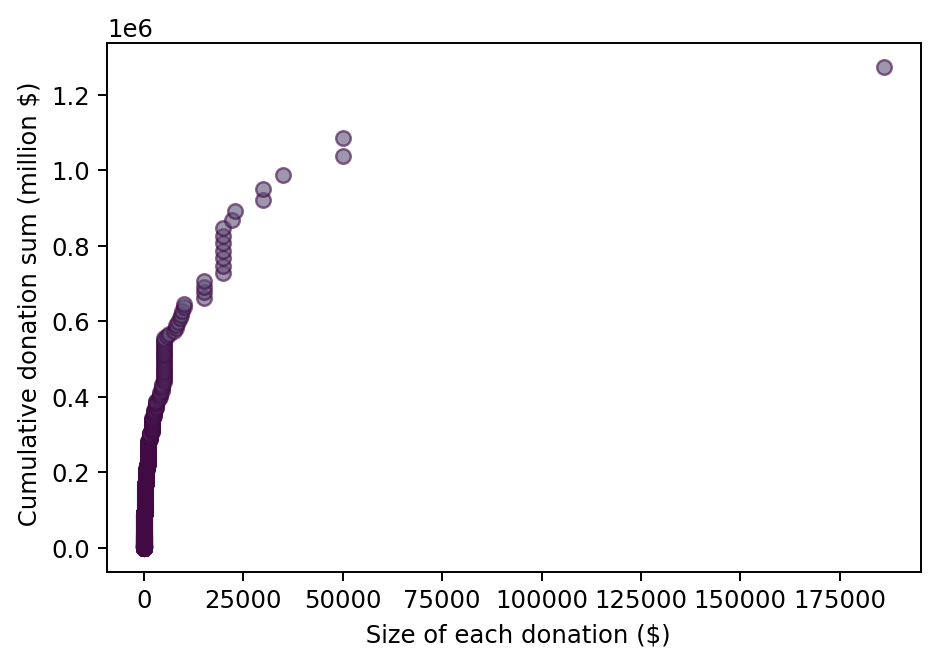

In [144]:
plt.figure(dpi = 175)
plt.scatter(donations_df.amount, donations_df.cum_sum, alpha = .6, edgecolors = '#410A45', c = '#5D5177')
#  plt.title('Small donations had a big contribution.')
plt.xlabel(' Size of each donation ($)')
plt.ylabel(' Cumulative donation sum (million $)')
plt.savefig('donation-sizes-and-contributions/cumulative_donations_1_no_title.png', dpi = 600)
plt.show()

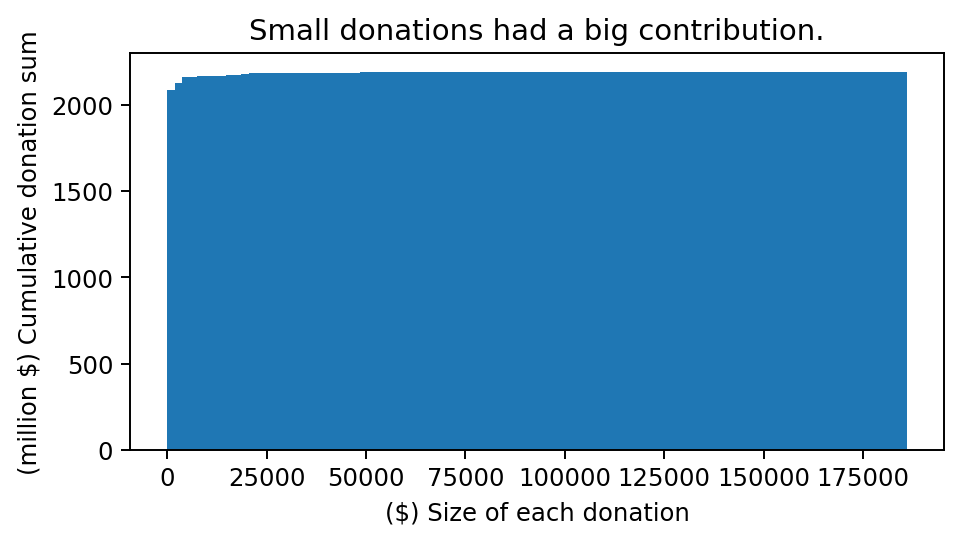

In [132]:
plt.figure(figsize = (6,3), dpi = 175)
plt.hist(donations_df.amount, cumulative=True, bins = 100)
plt.title('Small donations had a big contribution.')
plt.xlabel('($) Size of each donation')
plt.ylabel('(million $) Cumulative donation sum')
plt.savefig('donation-sizes-and-contributions/cumulative_donations_2.png', dpi = 600)
plt.show()

Alternatively, creating a pie chart with these contributions.

In [126]:
test_donation_list = pd.Series([1, 1, 1, 1, 1, 1, 2, 4, 5, 20, 28])
test_donation_list.quantile(.5, interpolation = 'nearest')

#  if the .quantile function is given an array of quantiles,
#  it returns a dataframe
quantile_locations = test_donation_list.quantile([.1,.2,.3], interpolation = 'nearest')
quantile_locations
test_donation_list[len(test_donation_list) - 2]

int(np.round( len(test_donation_list) * .5) )

6

In [130]:
def pie_filling(donation_amounts, quantiles):
    '''Takes in a list of values and a list of quantiles desired (between 0 and 1).
    Returns a list of the values contained within these quantiles.
    
    Ex.
    pie_filling([0,1,2,3,4], [.5])
    
    returns [[0,1, 2]], the values up to the median
    '''
    pie_slices = []
    pie_slice = []
    prev_index = 0
    for quantile in quantiles:
        index = int(np.round( len(donation_amounts) * quantile) )
        pie_slice = donation_amounts[prev_index : (index + 1)]
        pie_slices.append(pie_slice)
        prev_index = index
    last_pie_slice = donation_amounts[prev_index : -1]
    pie_slices.append(last_pie_slice)
    return pie_slices

In [131]:
pie_filling(test_donation_list, [.25,.75])

[0    1
 1    1
 2    1
 3    1
 dtype: int64,
 3    1
 4    1
 5    1
 6    2
 7    4
 8    5
 dtype: int64,
 8     5
 9    20
 dtype: int64]

In [134]:
#plt.figure(figsize = (6,3), dpi = 175)
plt.pie(donations_df.amount, donations_df.cum_sum)
plt.title('Small donations had a big contribution.')
plt.xlabel('($) Size of each donation')
plt.ylabel('(million $) Cumulative donation sum')
plt.savefig('donation-sizes-and-contributions/cumulative_donations_3.png', dpi = 600)
plt.show()

ValueError: Image size of 157663176x118778283 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>